# **EMAIL SPAM DETECTION - Logistic Regression**

# **Objective**
In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

Inshort we have to develop the machine learning model to detect spam email.




# **Import Library**

In [78]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import re

# **Import Data**

In [ ]:
email_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/spam.csv',encoding="ISO-8859-1")
email_df.head().style.background_gradient(cmap='jet')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


# **Describe Data**

In [ ]:
email_df.shape

(5572, 5)

In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
email_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

**The above lines of code has helped us to really understand what kind of dataset we are working on and how large it is. It also gave us insight on the types of dataset and the memory usage.**

In [ ]:
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
email_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# **Data Preprocessing**

In [ ]:
email_df.shape

(5572, 5)

In [ ]:
email_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
email_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
email_df.duplicated().sum()

403

**There are 403 duplicates in our df**

In [ ]:
email_df.drop_duplicates()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**duplicates have been dropped, hence, the reduction on the number of rows**

In [ ]:
email_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

to detect the presence of missing values, the above line of code was used. **Missing values were detected on unnamed2, unnamed3 and unnamed4.**

In [ ]:
email_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**renaming**

In [ ]:

email_df.rename(columns={'v1':'marker','v2':'report'},inplace=True)
email_df.head()

,marker,report
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
email_df['marker'].unique()

array(['ham', 'spam'], dtype=object)

# **Data Visualization**

<Axes: xlabel='marker', ylabel='count'>

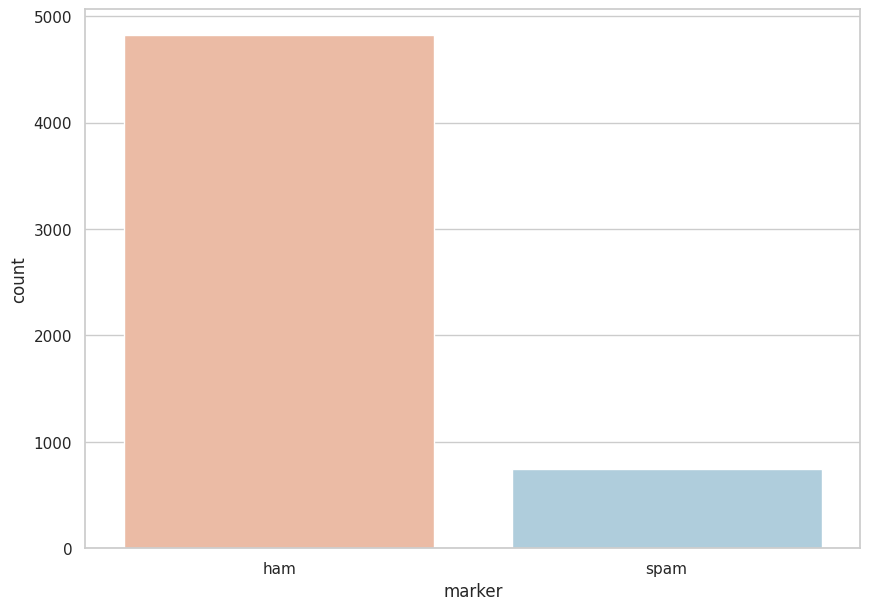

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='marker',data=email_df,palette='RdBu')

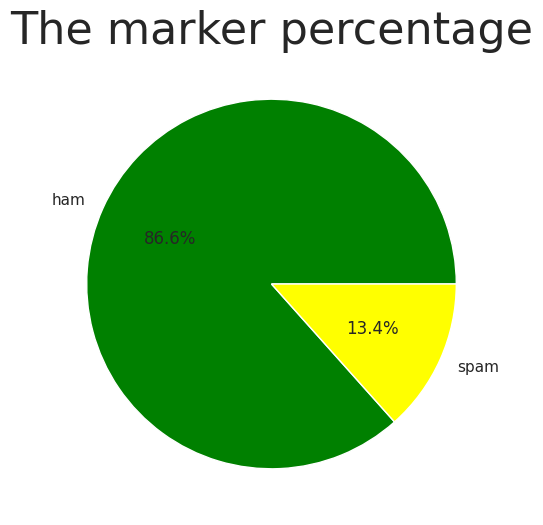

In [ ]:
#visuaize the label percentage in the train dataset
label=email_df['marker'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(14,6))
plt.pie(label,labels=['ham','spam'],colors=['green','yellow'],autopct='%1.1f%%')
#set the title name with fontsize
plt.title("The marker percentage",fontsize=32)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

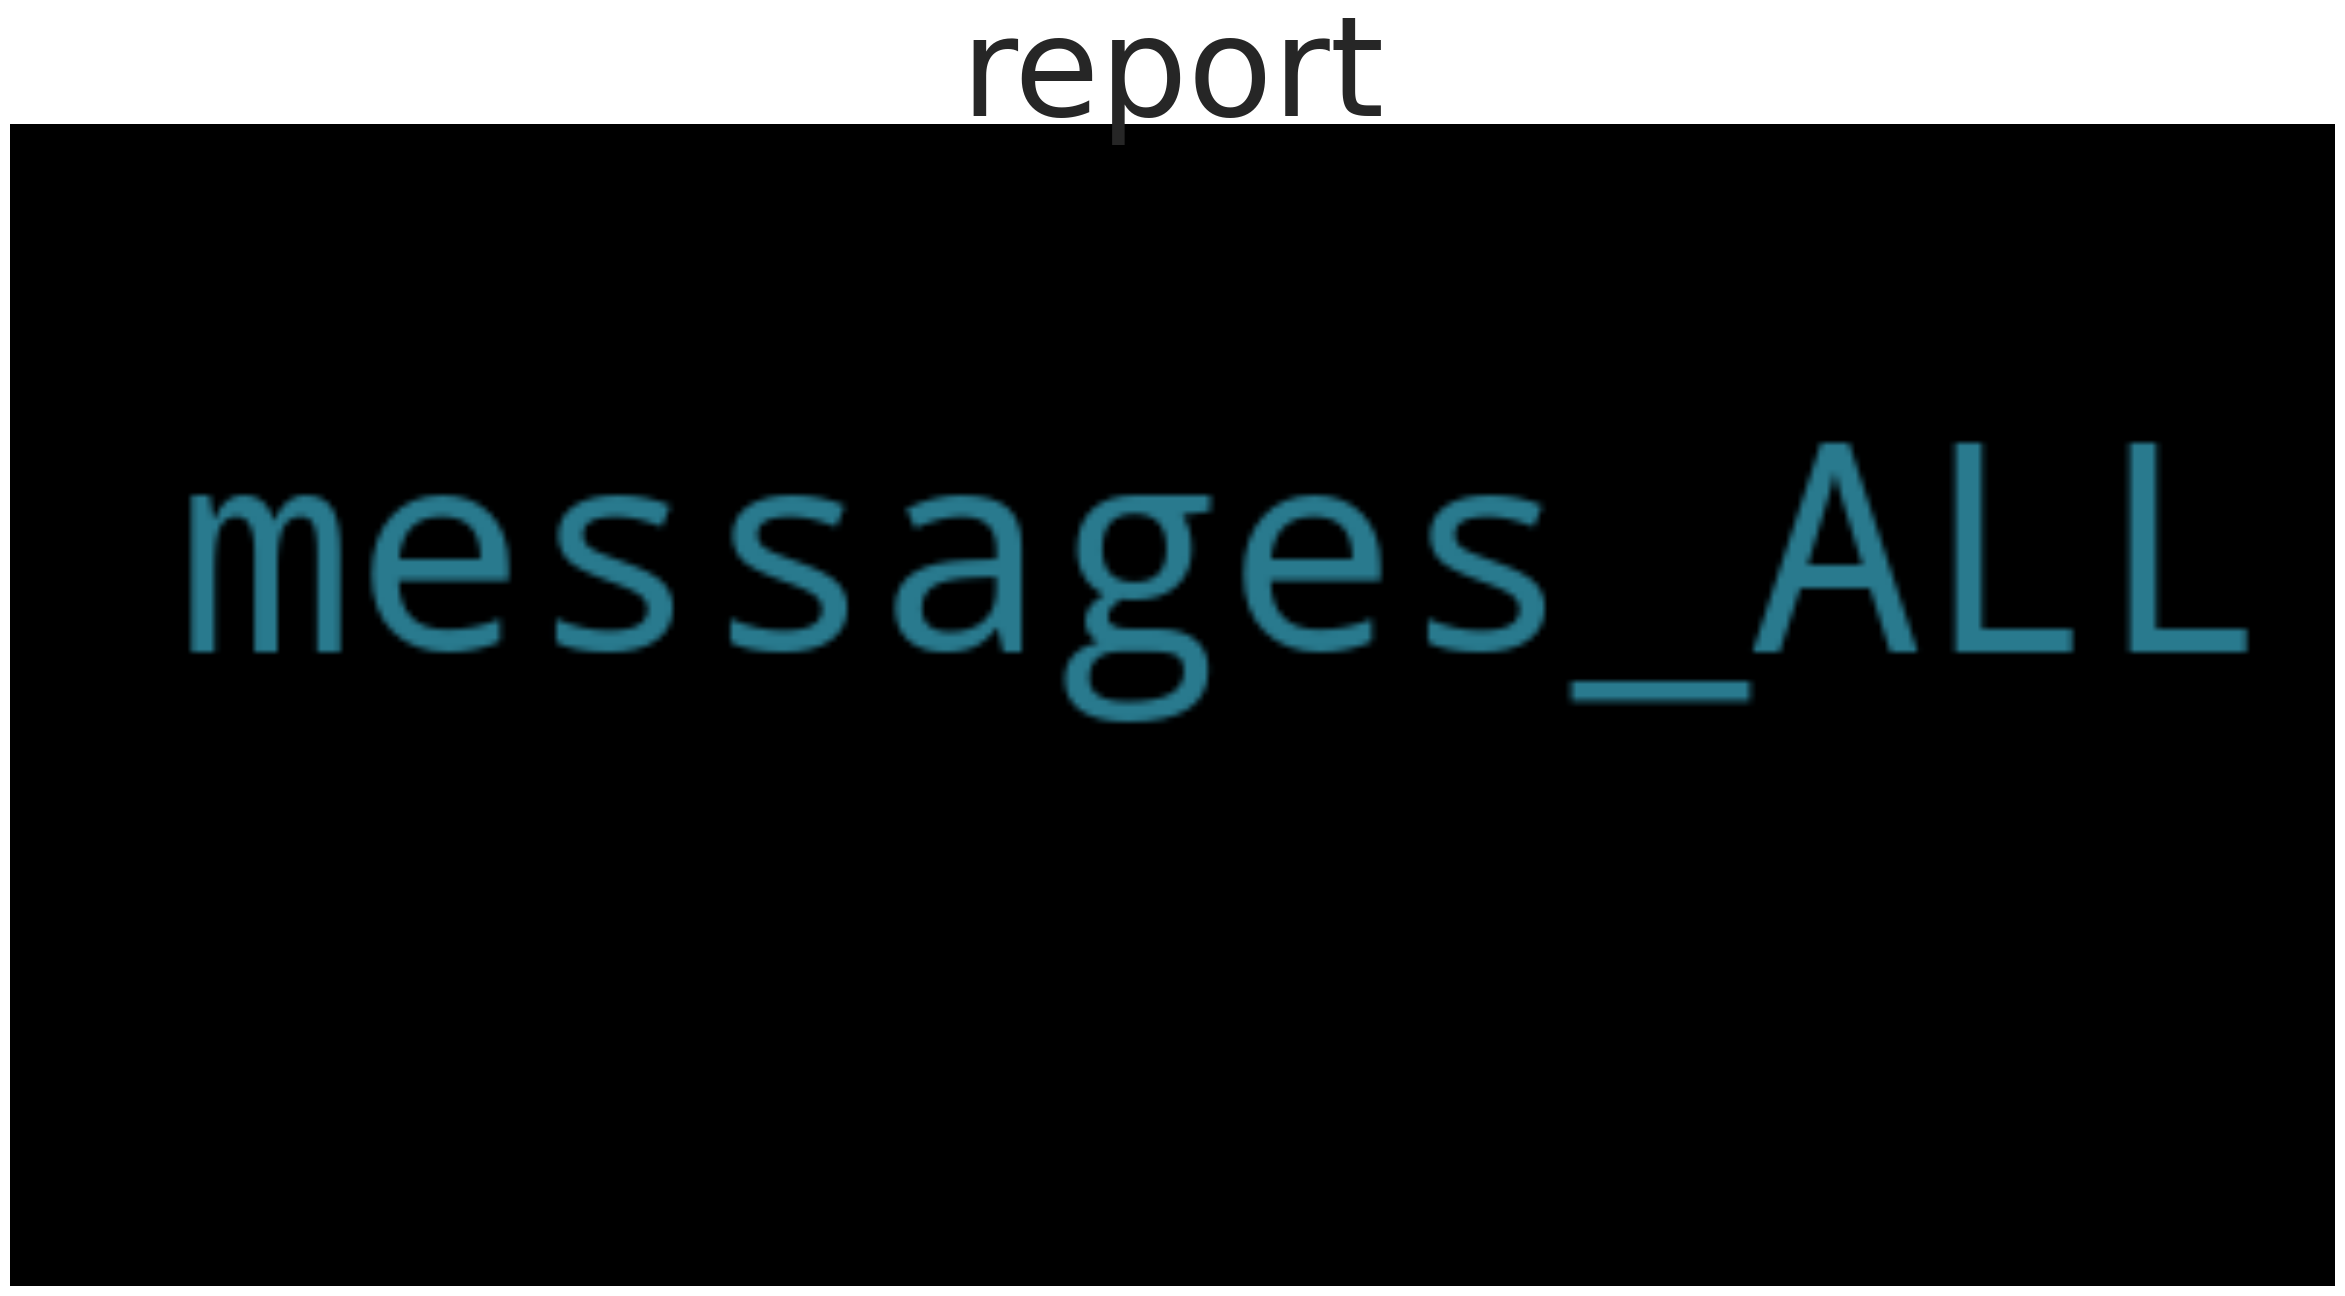

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
messages_All = " ".join(review for review in email_df['report'])
fig = plt.subplots(1, figsize=(30,30))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate("messages_ALL")
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title("report",fontsize=100)
plt.axis('off')

**Language processing**

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
ps = PorterStemmer()

In [ ]:
rev =re.sub('[^a-zA-Z]', ' ',email_df['report'][0])
rev

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [ ]:
rev.lower()

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [ ]:
rev.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
rev

['g',
 ' ',
 'u',
 'n',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'n',
 'g',
 ' ',
 'p',
 'n',
 ' ',
 ' ',
 'c',
 'r',
 'z',
 ' ',
 ' ',
 ' ',
 'a',
 'v',
 'l',
 'b',
 'l',
 'e',
 ' ',
 'n',
 'l',
 ' ',
 'n',
 ' ',
 'b',
 'u',
 'g',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 ' ',
 'w',
 'r',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'n',
 'e',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 ' ',
 'r',
 'e',
 ' ',
 'w',
 ' ',
 ' ',
 ' ']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
corpus = []

In [ ]:
#Now Create a function to clean the text and return the tokens. The cleaning of the text can be done by first
#removing punctuation and then removing the useless words also known as stop words.
import string
def process(text):
 nopunc = [char for char in text if char not in string.punctuation]
 nopunc = ''.join(nopunc)
 clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
 return clean
# to show the tokenization
email_df['report'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: report, dtype: object

In [ ]:
# Returning all sentences which are without Stopwords present in lower cases
corpus

[]

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
email_df.columns

Index(['marker', 'report'], dtype='object')

In [ ]:
#declaring the data into X and y
X = email_df['report'].values
y = email_df['marker'].values

In [ ]:
X.shape

(5572,)

In [ ]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
y.shape

(5572,)

In [ ]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Install the TfidfVectorizer for covert the categorical data to array
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [ ]:
print(X.shape, X)

(5572, 8672)   (0, 8489)	0.22080132794235655
  (0, 8267)	0.18238655630689804
  (0, 8030)	0.22998520738984352
  (0, 7645)	0.15566431601878158
  (0, 5920)	0.2553151503985779
  (0, 5537)	0.15618023117358304
  (0, 4476)	0.2757654045621182
  (0, 4350)	0.3264252905795869
  (0, 4087)	0.10720385321563428
  (0, 3634)	0.1803175103691124
  (0, 3594)	0.15318864840197105
  (0, 3550)	0.1481298737377147
  (0, 2327)	0.25279391746019725
  (0, 2048)	0.2757654045621182
  (0, 1751)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 1303)	0.24415547176756056
  (0, 1069)	0.3264252905795869
  (1, 8392)	0.4316010362639011
  (1, 5533)	0.5465881710238072
  (1, 5504)	0.27211951321382544
  (1, 4512)	0.4082988561907181
  (1, 4318)	0.5236458071582338
  (2, 8447)	0.18669123587240305
  (2, 8405)	0.14511814920515034
  :	:
  (5570, 7049)	0.20534386872930602
  (5570, 7039)	0.18426763178390448
  (5570, 5334)	0.21003730857873565
  (5570, 4615)	0.15965529817341642
  (5570, 4218)	0.1224661019112692
  (5570, 4161)	0.282

In [ ]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
print(X.shape, y.shape)

(5572, 8672) (5572,)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 8672), (1672, 8672), (3900,), (1672,))

# **Modeling 1**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adam=AdaBoostClassifier()

In [ ]:
adam.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# **Prediction**

In [ ]:
adam_pred=adam.predict(X_test)
adam_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(classification_report(y_test,adam_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1446
        spam       0.93      0.85      0.88       226

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



# **Model Accuracy**

In [ ]:
accuracy=accuracy_score(y_test, adam_pred)
print(accuracy)

0.9700956937799043


<Axes: >

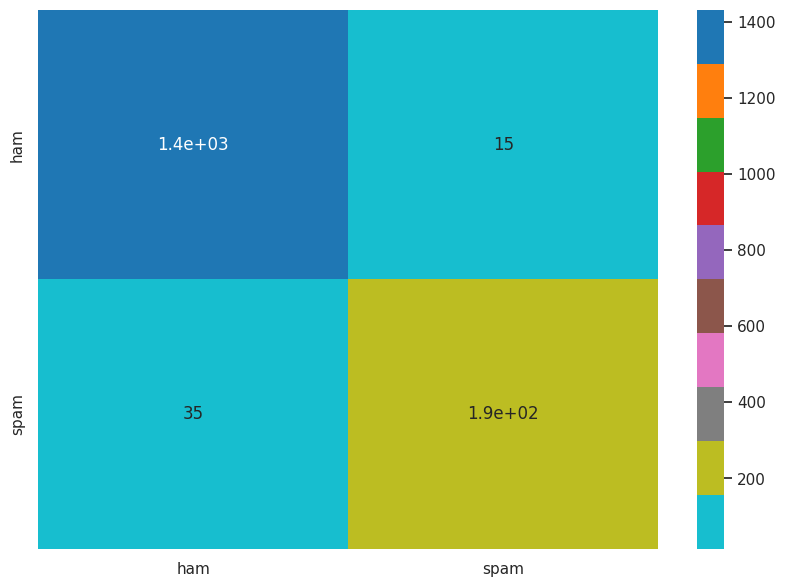

In [ ]:
cm=confusion_matrix(y_test,adam_pred)
sns.heatmap(cm,annot=True,cmap='tab10_r',xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# **Modeling 2**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

# **Prediction**

In [ ]:
tree_pred=tree.predict(X_test)
tree_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1446
        spam       0.91      0.85      0.88       226

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



# **Model Accuracy**

In [ ]:
accuracy=accuracy_score(y_test, tree_pred)
print(accuracy)

0.9683014354066986


<Axes: >

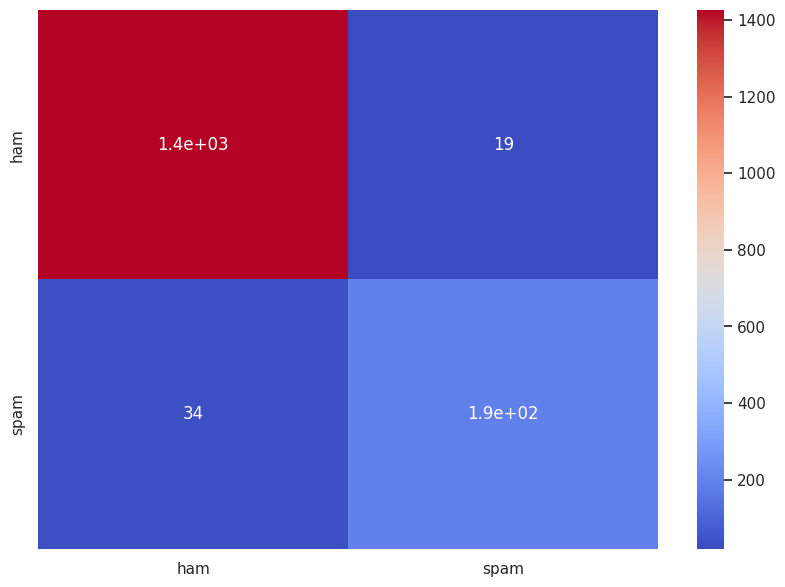

In [ ]:
cm=confusion_matrix(y_test,tree_pred)
sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# **Explaination**
accuracy score is used to evaluate the performance of the machine learning model

here, accuracy score = 0.97

which is close to 1

if accuracy value is 1, it means our model is well trained for unseen data

if accuracy value is o, it means our model is badly trained for unseen data

hence our machine learning model for spam mail detection is 96% accurate